# Машинное обучение (ДВФУ)

## Домашнее задание 2 (10 баллов)

### Дедлайн: 19 марта, 23:59

Домашнее задание состоит из двух частей. Каждая часть оценивается в 5 баллов, а все задания внутри одной части имеют одинаковый вес.

### Про задание

1. Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

2. Гуглите как можно больше! Если у вас появляется какой-то вопрос про использование метода numpy, скорее всего, на него уже есть ответ в Google – главное, правильно задать вопрос! Использование поисковика резко поощряется. 

3. Плагиат не допускается (нельзя просто так списать у друга). **НО:** можно использовать **любую** информацию из открытых Интернет-источников с указанием ссылки на них. Правила оформления из ДЗ 1 сохраняются.

---

## Часть 1: Pandas (5 баллов)

In [1]:
import pandas as pd

### Описание данных

В папке Data находится информация о студентах. Всего 10 групп студентов. Файлы делятся на две категории:
* Students_info_i - информация о студентах из группы i
* Students_marks_i - оценки студентов из группы i за экзамены

Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: merge, join, concat. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.

Подробно об этих методах посмотрите [вот тут](https://www.kaggle.com/residentmario/renaming-and-combining#Combining).

**Задание 1:** Соберите всю информацию о студентах в одну таблицу df. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.

In [2]:
data = pd.read_csv('Data/Students_info_0.csv', index_col='index')
for i in range(1, 10):
    data = pd.concat([data, pd.read_csv(f'Data/Students_info_{i}.csv', index_col='index')])
    
marks = pd.read_csv('Data/Students_marks_0.csv', index_col='index')
for i in range(1, 10):
    marks = pd.concat([marks, pd.read_csv(f'Data/Students_marks_{i}.csv', index_col='index')])
students = data.join(marks)    
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
index,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75


**Задание 2:** Удалите столбец index у полученной таблицы. Напечатайте первые 10 строк таблицы.

**Задание 3:** Выведите на экран размеры полученной таблицы.

In [3]:
students.shape

(1000, 9)

**Задание 4:** Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение).

In [4]:
students.describe().loc[['min', 'max', 'mean', 'std'], :]

,math score,reading score,writing score
min,0.00000,17.000000,10.000000
max,100.00000,100.000000,100.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657


**Задание 5:** Проверьте, есть ли в таблице пропущенные значения.

In [5]:
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
group                          0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Задание 6:** Выведите на экран средние баллы студентов по каждому предмету (math, reading, writing).

In [6]:
students[['math score', 'reading score', 'writing score']].mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

**Задание 7:** Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)? Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.**

In [7]:
students.groupby("test preparation course")[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


**Задание 8:** Выведите на экран все различные значения из столбца lunch.**

In [8]:
print(*students.lunch.value_counts().index)

standard free/reduced


**Зафиксируем минимальный балл для сдачи экзамена**.

In [9]:
passmark = 60

**Задание 9:** Ответьте на вопрос:
* Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике? 

In [10]:
stud_female_none = students.query('gender == "female" and `test preparation course` == "none"')
print(f"Доля женщин, не проходивших курс подготовки к экзамену, не сдавшая математику - "
      f"{stud_female_none.query('`math score` < @passmark').shape[0] / stud_female_none.shape[0]:0.3f}")

Доля женщин, не проходивших курс подготовки к экзамену, не сдавшая математику - 0.425


**Задание 10:** С помощью groupby выполните задание ниже. Выведите время выполнения этого задания (подсказка: модуль `time`).

* Для каждого уровня образования выведите минимальный балл за экзамен по письму.

In [11]:
%time students.groupby('parental level of education')["writing score"].min()

CPU times: total: 0 ns
Wall time: 3 ms


parental level of education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64

**Задание 11:** Выполните задание 10 с помощью циклов. Сравните время выполнения.

In [12]:
levels_educ = tuple(students['parental level of education'].value_counts().index)

In [13]:
%%time
for level in levels_educ:
    print(f"{level:<20} {students.query('`parental level of education` == @level')['writing score'].min()}")

some college         19
associate's degree   35
high school          15
some high school     10
bachelor's degree    38
master's degree      46
CPU times: total: 15.6 ms
Wall time: 12 ms


---

## Часть 2: Градиентный спуск (5 баллов)

In [14]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

**Примечание:** если вы не знакомы с реализацией в виде классов, ничего страшного! Все задания сводятся к реализации обычных питоновских функций!

In [29]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 12:** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам сверху.

**Подсказка:** функции внутри этого класса можно воспринимать и реализовывать как обычные функции! 

In [51]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return (((X @ w) - y) ** 2).sum() / y.size
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (X.T @ ((X @ w) - y)) * (2 / y.size)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [53]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 13:** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [94]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    res = [list(w)]
    for _ in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        res.append(w)
    return np.array(res)

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [95]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [96]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [100]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(5, 5))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 14:** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

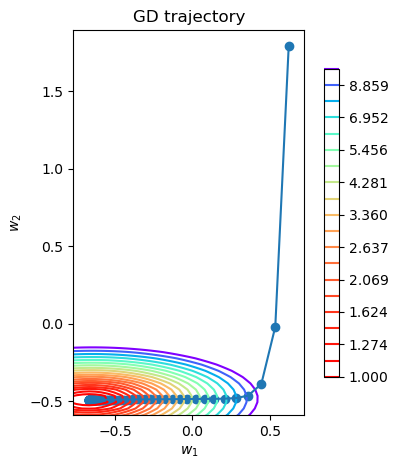

In [106]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.005, 100)
plot_gd(w_list, X, y, loss)